# Palmer Penguins Modeling

Import the Palmer Penguins dataset and print out the first few rows.

Suppose we want to predict `species` using the other variables in the dataset.

**Dummify** all variables that require this.

In [1]:
# Code Here
!pip install sklearn
!pip install palmerpenguins
import pandas as pd
from palmerpenguins import load_penguins
penguins=load_penguins()
penguins=pd.get_dummies(penguins, columns=['island','sex'])
penguins=penguins.dropna()
penguins

  Preparing metadata (setup.py) ... done
  Created wheel for sklearn: filename=sklearn-0.0.post11-py3-none-any.whl size=2959 sha256=d8746c6503e19c9d345d8e146938e937e17b8007b7d57c1b7946aa16236a13cf
  Stored in directory: /root/.cache/pip/wheels/aa/9c/60/f67813603a52fc35057868f1aba0003cc75b72583dcaa2c341
Successfully built sklearn


,species,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,year,island_Biscoe,island_Dream,island_Torgersen,sex_female,sex_male
0,Adelie,39.1,18.7,181.0,3750.0,2007,0,0,1,0,1
1,Adelie,39.5,17.4,186.0,3800.0,2007,0,0,1,1,0
2,Adelie,40.3,18.0,195.0,3250.0,2007,0,0,1,1,0
4,Adelie,36.7,19.3,193.0,3450.0,2007,0,0,1,1,0
5,Adelie,39.3,20.6,190.0,3650.0,2007,0,0,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...
339,Chinstrap,55.8,19.8,207.0,4000.0,2009,0,1,0,0,1
340,Chinstrap,43.5,18.1,202.0,3400.0,2009,0,1,0,1,0
341,Chinstrap,49.6,18.2,193.0,3775.0,2009,0,1,0,0,1
342,Chinstrap,50.8,19.0,210.0,4100.0,2009,0,1,0,0,1


In [13]:
from sklearn.preprocessing import LabelEncoder

X=penguins.drop(['species'], axis=1)
y=penguins['species']

Let's use the other variables to predict `species`. Prepare your data and fit the following models on the entire dataset:

* Two kNN models (for different values of K)
* Two decision tree models (for different complexities of trees)

Compute the following, for each of your models, on test data. Keep in mind that you may need to stratify your creation of the training and test data.

* Confusion matrix
* Overall Accuracy
* Precision, Recall, AUC, and F1-score for each species

Create one ROC plot for the species of your choice.

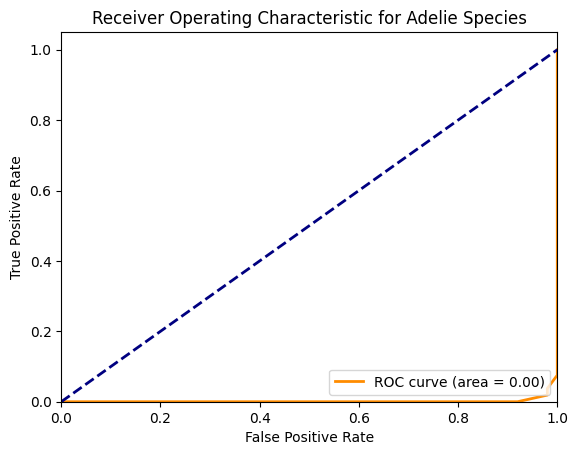

Confusion Matrix:
 [[49  1  0]
 [ 2 17  0]
 [ 0  0 34]]
Accuracy: 0.970873786407767
Precision: 0.9684095860566448
Recall: 0.9582456140350878
F1 Score: 0.963071982873963
AUC: 0.0016981132075471704


In [20]:
import pandas as pd
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, recall_score, f1_score, roc_curve, auc
import matplotlib.pyplot as plt
from sklearn.preprocessing import label_binarize
# Code Here

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

knn1_pipeline=Pipeline(
    [
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=20))
    ]
)
knn1_pipeline.fit(X_train, y_train)
y_knn1_test_pred=knn1_pipeline.predict(X_test)

# Confusion Matrix
conf_matrix = confusion_matrix(y_test, y_knn1_test_pred)

# Accuracy
accuracy = accuracy_score(y_test, y_knn1_test_pred)

# Precision and Recall
precision_adelie = precision_score(y_test, y_knn1_test_pred, average='macro')
recall_adelie = recall_score(y_test, y_knn1_test_pred, average='macro')

# F1 Score
f1_adelie = f1_score(y_test, y_knn1_test_pred, average='macro')

# ROC curve and AUC
y_test_adelie_1=(y_test=='Adelie').astype(int)
y_prob_knn1=knn1_pipeline.predict_proba(X_test)
fpr_knn1, tpr_knn1, thresholds_knn1 = roc_curve(y_test_adelie_1, y_prob_knn1[:,0], pos_label=0)
roc_auc = auc(fpr_knn1, tpr_knn1)

# Plotting ROC curve
plt.figure()
plt.plot(fpr_knn1, tpr_knn1, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Adelie Species')
plt.legend(loc="lower right")
plt.show()

# Print the metrics
print("Confusion Matrix:\n", conf_matrix)
print("Accuracy:", accuracy)
print("Precision:", precision_adelie)
print("Recall:", recall_adelie)
print("F1 Score:", f1_adelie)
print("AUC:", roc_auc)

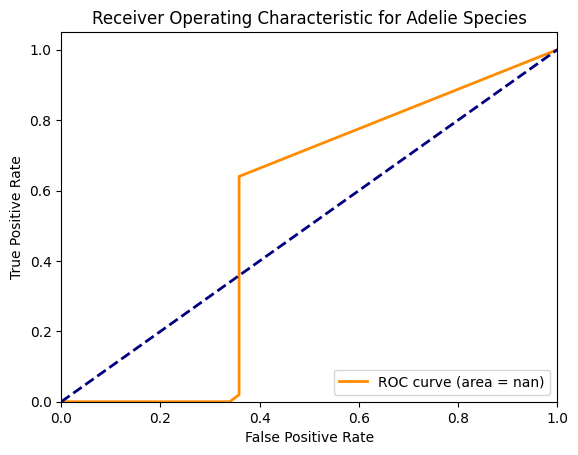

Confusion Matrix:
 [[47  1  2]
 [ 0 19  0]
 [ 0  0 34]]
Accuracy: 0.970873786407767
Precision: 0.9648148148148148
Recall: 0.98
F1 Score: 0.9716199035786665
AUC: 0.5262264150943397


In [19]:
knn2_pipeline=Pipeline(
    [
        ('scaler', StandardScaler()),
        ('knn', KNeighborsClassifier(n_neighbors=40))
    ]
)
knn2_pipeline.fit(X_train, y_train)
y_knn2_test_pred=knn2_pipeline.predict(X_test)

# Confusion Matrix
conf_matrix_2 = confusion_matrix(y_test, y_knn2_test_pred)

# Accuracy
accuracy_2 = accuracy_score(y_test, y_knn2_test_pred)

# Precision and Recall
precision_adelie_2 = precision_score(y_test, y_knn2_test_pred, average='macro')
recall_adelie_2 = recall_score(y_test, y_knn2_test_pred, average='macro')

# F1 Score
f1_adelie_2 = f1_score(y_test, y_knn2_test_pred, average='macro')

# ROC curve and AUC
y_test_adelie_2=(y_test=='Adelie').astype(int)
y_prob_knn2=knn2_pipeline.predict_proba(X_test)
fpr_knn2, tpr_knn2, thresholds_knn2 = roc_curve(y_test_adelie_2, y_prob_knn2[:,1])
roc_auc_2 = auc(fpr_knn2, tpr_knn2)

# Plotting ROC curve
plt.figure()
plt.plot(fpr_knn2, tpr_knn2, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Adelie Species')
plt.legend(loc="lower right")
plt.show()

# Print the metrics
print("Confusion Matrix:\n", conf_matrix_2)
print("Accuracy:", accuracy_2)
print("Precision:", precision_adelie_2)
print("Recall:", recall_adelie_2)
print("F1 Score:", f1_adelie_2)
print("AUC:", roc_auc_2)

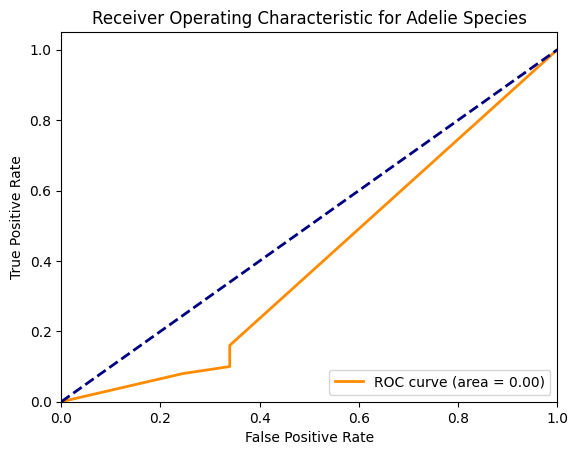

Confusion Matrix:
 [[45  5  0]
 [ 1 18  0]
 [ 0  0 34]]
Accuracy: 0.941747572815534
Precision: 0.9202898550724639
Recall: 0.9491228070175438
F1 Score: 0.9315476190476191
AUC: 0.40132075471698114


In [22]:
dt1_pipeline=Pipeline(
    [
        ('scaler', StandardScaler()),
        ('dt', DecisionTreeClassifier(min_samples_leaf=5))
    ]
)
dt1_pipeline.fit(X_train, y_train)
y_dt1_test_pred=dt1_pipeline.predict(X_test)

# Confusion Matrix
conf_matrix_3 = confusion_matrix(y_test, y_dt1_test_pred)

# Accuracy
accuracy_3 = accuracy_score(y_test, y_dt1_test_pred)

# Precision and Recall
precision_adelie_3 = precision_score(y_test, y_dt1_test_pred, average='macro')
recall_adelie_3 = recall_score(y_test, y_dt1_test_pred, average='macro')

# F1 Score
f1_adelie_3 = f1_score(y_test, y_dt1_test_pred, average='macro')

# ROC curve and AUC
y_test_adelie_3=(y_test=='Adelie').astype(int)
y_prob_dt1=dt1_pipeline.predict_proba(X_test)
fpr_dt1, tpr_dt1, thresholds_dt1 = roc_curve(y_test_adelie_3, y_prob_dt1[:,1])
roc_auc_3 = auc(fpr_dt1, tpr_dt1)

# Plotting ROC curve
plt.figure()
plt.plot(fpr_dt1, tpr_dt1, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Adelie Species')
plt.legend(loc="lower right")
plt.show()

# Print the metrics
print("Confusion Matrix:\n", conf_matrix_3)
print("Accuracy:", accuracy_3)
print("Precision:", precision_adelie_3)
print("Recall:", recall_adelie_3)
print("F1 Score:", f1_adelie_3)
print("AUC:", roc_auc_3)

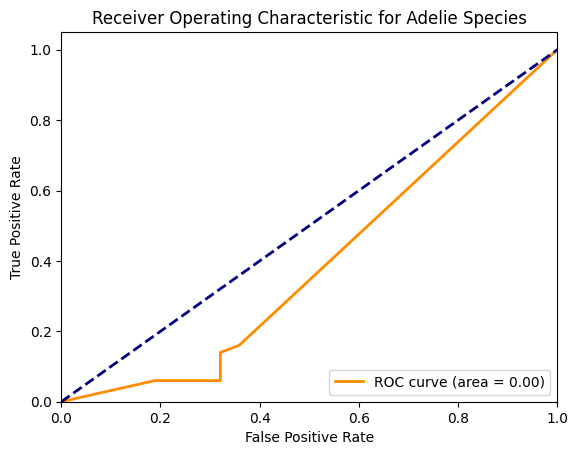

Confusion Matrix:
 [[42  7  1]
 [ 1 17  1]
 [ 0  0 34]]
Accuracy: 0.9029126213592233
Precision: 0.876507321274763
Recall: 0.911578947368421
F1 Score: 0.8884506840995963
AUC: 0.39132075471698113


In [23]:
dt2_pipeline=Pipeline(
    [
        ('scaler', StandardScaler()),
        ('dt', DecisionTreeClassifier(min_samples_leaf=10))
    ]
)
dt2_pipeline.fit(X_train, y_train)
y_dt2_test_pred=dt2_pipeline.predict(X_test)

# Confusion Matrix
conf_matrix_4 = confusion_matrix(y_test, y_dt2_test_pred)

# Accuracy
accuracy_4 = accuracy_score(y_test, y_dt2_test_pred)

# Precision and Recall
precision_adelie_4 = precision_score(y_test, y_dt2_test_pred, average='macro')
recall_adelie_4 = recall_score(y_test, y_dt2_test_pred, average='macro')

# F1 Score
f1_adelie_4 = f1_score(y_test, y_dt2_test_pred, average='macro')

# ROC curve and AUC
y_test_adelie_4=(y_test=='Adelie').astype(int)
y_prob_dt2=dt2_pipeline.predict_proba(X_test)
fpr_dt2, tpr_dt2, thresholds_dt2 = roc_curve(y_test_adelie_4, y_prob_dt2[:,1])
roc_auc_4 = auc(fpr_dt2, tpr_dt2)

# Plotting ROC curve
plt.figure()
plt.plot(fpr_dt2, tpr_dt2, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic for Adelie Species')
plt.legend(loc="lower right")
plt.show()

# Print the metrics
print("Confusion Matrix:\n", conf_matrix_4)
print("Accuracy:", accuracy_4)
print("Precision:", precision_adelie_4)
print("Recall:", recall_adelie_4)
print("F1 Score:", f1_adelie_4)
print("AUC:", roc_auc_4)